## **Everything Counts: Assignment 1**

# https://github.com/najidreh/assignment1-covid-matches

*Assessment Brief: creation of a GitHub repository that
contains: **(1)** a dataset
on a problem topic of
the student’s choice;
and **(2)** an executable
code notebook that
summarises and
visualises the relevant
features of of the
dataset*

## Premier League 2020-2022

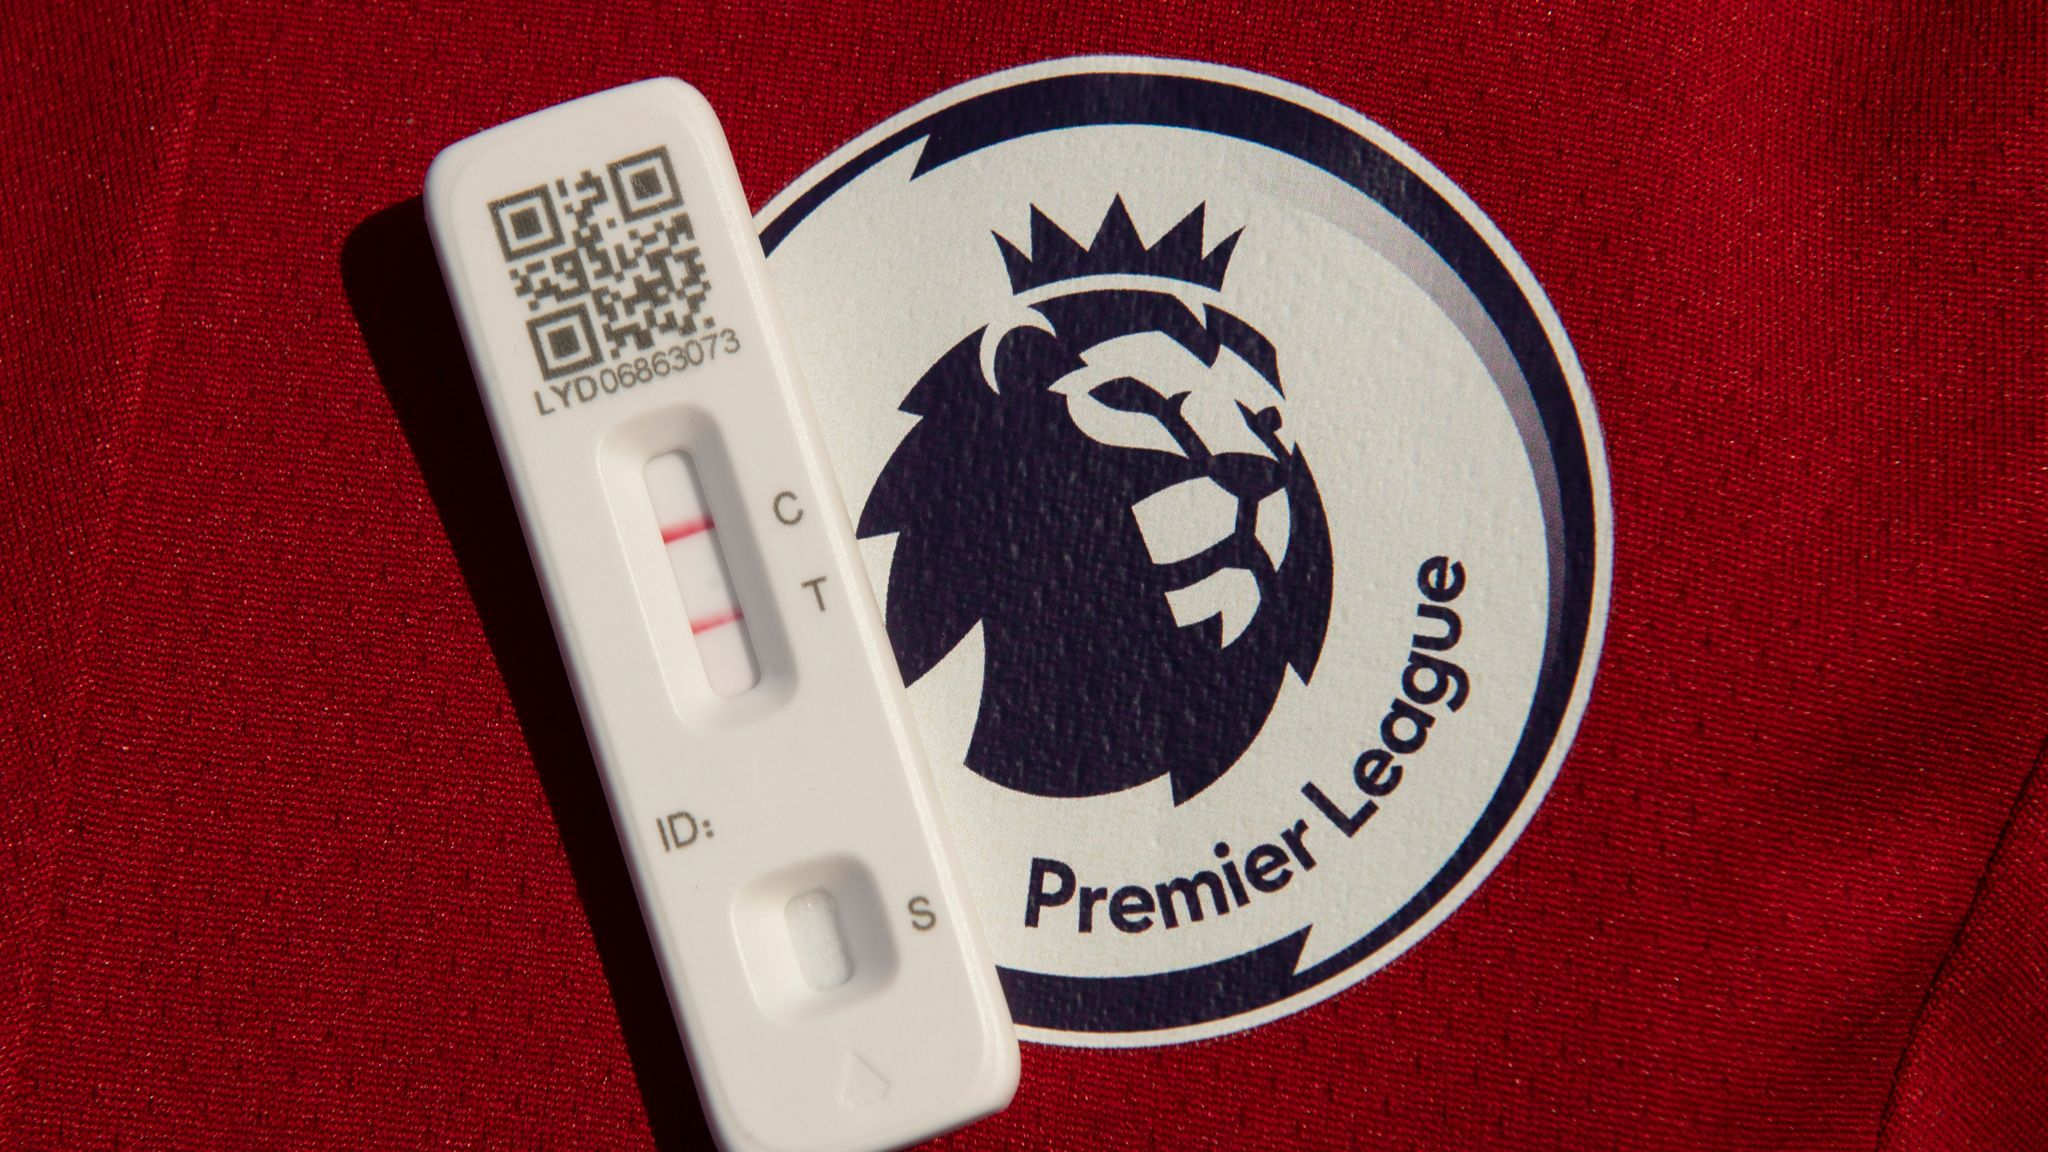

**(1)** The dataset was collected from Kaggle: https://www.kaggle.com/datasets/elnahas/premier-league-20202022 from match statistics in the Premier League between 2020 and 2022.

The problem topic at hand is the affect of the covid-19 pandemic on both sporting final results and the underlying data, specifically Premier League football where fan attendance in stadiums was prohibited in the 20/21 season but resumed from 21/22.

The dataset contains 1,389 entries with 28 characteristic columns.    

**(2)** The goal of this notebook is to summarise and visualise the relevant feastures of the dataset.

The effect of *null attendance* vs *non-null attendance* on:
* Goals per game
* xG per game
* Home vs Away team results
* penalties awarded

## Data Handling

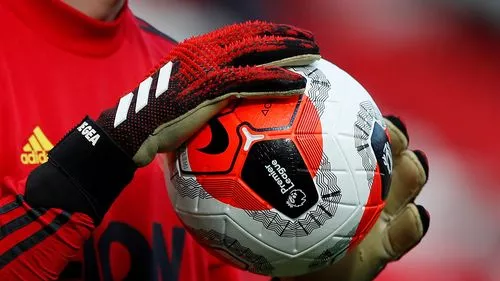

**Setup: what do we need?**

In [51]:
# import useful libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# connect to GitHub repository
!apt-get install -y git
!git config --global user.email "najid.rehman@lis.ac.uk"
!git config --global user.name "najidreh"
!git clone https://github.com/najidreh/assignment1-covid-matches

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Cloning into 'assignment1-covid-matches'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 15 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (15/15), 180.03 KiB | 882.00 KiB/s, done.


In [53]:
# change directory
%cd assignment1-covid-matches/

/content/assignment1-covid-matches/assignment1-covid-matches


In [54]:
# reading dataset
# call dataset df_cm for data-frame_covid-matches
df_cm = pd.read_csv('covid-matches-dataset.csv')

In [55]:
# double check
%ls

covid-matches-dataset.csv


**Overview: how does it look?**

In [6]:
# display top 5 rows with 28 columns from dataset
df_cm.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,1,12/09/2020,17:30,Premier League,Matchweek 1,Sat,Home,W,4,3,...,Match Report,NaN,20,4,17.0,0,2,2,2021,Liverpool
1,0,12/09/2020,20:00,Premier League,Matchweek 1,Sat,Home,L,0,2,...,Match Report,NaN,15,3,15.6,0,0,0,2021,West Ham United
2,1,12/09/2020,12:30,Premier League,Matchweek 1,Sat,Away,W,3,0,...,Match Report,NaN,13,5,13.6,2,0,0,2021,Arsenal
3,0,12/09/2020,17:30,Premier League,Matchweek 1,Sat,Away,L,3,4,...,Match Report,NaN,6,3,17.5,1,0,0,2021,Leeds United
4,0,12/09/2020,20:00,Premier League,Matchweek 1,Sat,Away,W,2,0,...,Match Report,NaN,16,3,16.2,1,0,0,2021,Newcastle United


In [7]:
# display shape
df_cm.shape

(1389, 28)

The dataset has 1,389 match recordings and 28 characteristics

In [8]:
# print columns
df_cm.columns

Index(['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result',
       'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist',
       'fk', 'pk', 'pkatt', 'season', 'team'],
      dtype='object')

- **Unnamed: 0**: Index column or placeholder, often irrelevant and autogenerated.
- **date**: Date of the match in `DD/MM/YYYY` format.
- **time**: Time of the match.
- **comp**: Competition in which the match took place (e.g., Premier League).
- **round**: Specific round or stage of the competition (e.g., Matchweek 1).
- **day**: Day of the week when the match occurred (e.g., Sat for Saturday).
- **venue**: Indicates whether the match was played at "Home" or "Away".
- **result**: Outcome of the match for the team (e.g., W for Win, L for Loss, D for Draw).
- **gf**: Goals scored by the team (Goals For).
- **ga**: Goals conceded by the team (Goals Against).
- **opponent**: Name of the opposing team.
- **xg**: Expected goals for the team, a measure of scoring likelihood.
- **xga**: Expected goals against, a measure of the opposing team's scoring likelihood.
- **poss**: Percentage of possession during the match.
- **attendance**: Number of spectators attending the match.
- **captain**: Name of the team's captain for the match.
- **formation**: Team's tactical formation (e.g., 4-3-3).
- **referee**: Referee officiating the match.
- **match report**: Link or reference to the detailed match report.
- **notes**: Additional notes or comments about the match.
- **sh**: Number of total shots taken by the team.
- **sot**: Number of shots on target.
- **dist**: Average distance of shots taken.
- **fk**: Number of free kicks earned by the team.
- **pk**: Number of penalties scored by the team.
- **pkatt**: Number of penalty attempts made by the team.
- **season**: The football season during which the match took place (e.g., 2021).
- **team**: Name of the team whose data is recorded in the row.

These are the 28 measurements recorded for each match in our dataset. Some of which, we will zoom into for our exploration to see if the covid-19 pandemic and subsequent empty stadiums provide an interesting comparison.

**Scan: what is missing?**

In [9]:
# Check for null values for all columns
df_cm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1389 non-null   int64  
 1   date          1389 non-null   object 
 2   time          1389 non-null   object 
 3   comp          1389 non-null   object 
 4   round         1389 non-null   object 
 5   day           1389 non-null   object 
 6   venue         1389 non-null   object 
 7   result        1389 non-null   object 
 8   gf            1389 non-null   int64  
 9   ga            1389 non-null   int64  
 10  opponent      1389 non-null   object 
 11  xg            1389 non-null   float64
 12  xga           1389 non-null   float64
 13  poss          1389 non-null   int64  
 14  attendance    693 non-null    float64
 15  captain       1389 non-null   object 
 16  formation     1389 non-null   object 
 17  referee       1389 non-null   object 
 18  match report  1389 non-null 

In attendance column there are 693 non-null values and therefore 696 null values. This is expected as there were games during this period with no attendance (due to covid-19).

We can also remove the additional notes column as there are no inputs.

Distance characteristic has a single null value. We should fill this for best practice in data cleaning.

**Spread: what does it show?**

In [10]:
# determine spread of data, what is the mean of difference characteristic
df_cm.describe()

,Unnamed: 0,gf,ga,xg,xga,poss,attendance,notes,sh,sot,dist,fk,pk,pkatt,season
count,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,693.000000,0.0,1389.000000,1389.000000,1388.000000,1389.000000,1389.000000,1389.000000,1389.000000
mean,22.771778,1.335493,1.380850,1.304176,1.338445,49.702664,36089.963925,NaN,12.153348,4.041037,17.011527,0.455724,0.119510,0.147588,2021.452844
std,13.668172,1.274235,1.291049,0.767268,0.789360,12.401897,17797.991778,NaN,5.268876,2.403866,2.988364,0.665389,0.352187,0.387804,0.497951
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,NaN,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,2021.000000
25%,11.000000,0.000000,0.000000,0.700000,0.700000,40.000000,24351.000000,NaN,8.000000,2.000000,15.100000,0.000000,0.000000,0.000000,2021.000000
50%,22.000000,1.000000,1.000000,1.200000,1.200000,50.000000,32061.000000,NaN,12.000000,4.000000,16.900000,0.000000,0.000000,0.000000,2021.000000
75%,33.000000,2.000000,2.000000,1.800000,1.800000,59.000000,52214.000000,NaN,15.000000,5.000000,18.800000,1.000000,0.000000,0.000000,2022.000000
max,59.000000,9.000000,9.000000,4.600000,5.000000,82.000000,73458.000000,NaN,31.000000,15.000000,34.900000,4.000000,3.000000,3.000000,2022.000000


The mean attendance is 36,090. This includes stadiums across the premier league of various sizes and may or may not include periods of limited or restricted attendance. Potentially not a useful average over these two covid-matches seasons but we will double check later.

Therefore, for better data exploration, we should clean our data. This will separate matches without attendance (aka null) and with attendance (aka non-null). We can also remove columns which do not provide useful entries for us.

## Data Cleaning

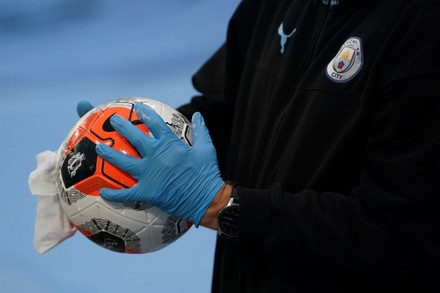

**Reassemble: what is and isn't important?**

In [47]:
# remove the following columns for our data-frame_covid-matches_clean
df_cm_clean = df_cm.drop(columns=['Unnamed: 0', 'notes', 'comp', 'formation', 'match report'], errors='ignore')

* Unnamed is removed for irrelevance
* Notes is removed as there are no entries throughout
* Comp is removed as all entries are Premier League
* Formation is removed as we have deemed this uninteresting for the covid-19 problem
* Match report is removed as all entries are the same

In [68]:
# create new column for total goals in game, using the sum of gf and ga
df_cm_clean['tg'] = df_cm_clean['gf'] + df_cm_clean['ga']

We want to use total goals in a game to see whether in-game metrics, as a whole, are different with and without fans. This is irrespective of which player and which team scored. Big picture first.

In [62]:
# create new column for result Home win, Away win, or Draw aka HAD
# use gf and ga to determine as if gf is greater than ga, the Home team has won and vice versa, else draw
def determine_result(row):
    if row['gf'] > row['ga']:
        return 'Home'
    elif row['gf'] < row['ga']:
        return 'Away'
    else:
        return 'Draw'

# create a new column using pandas apply function that applies determine_result function along rows of dataset
df_cm_clean['HAD'] = df_cm_clean.apply(determine_result, axis=1)

Super useful because now we can zoom in on this new column which can tell us if Home or Away results, on the whole, changed with and without fans. Home advantage? Let's see...

In [63]:
# dist is missing one data entry so fill in with median of all other dist entries
df_cm_clean['dist'] = df_cm_clean['dist'].fillna(df_cm_clean['dist'].median())
# meticulous

In [69]:
df_cm_clean

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,sh,sot,dist,fk,pk,pkatt,season,team,tg,HAD
0,12/09/2020,17:30,Matchweek 1,Sat,Home,W,4,3,Leeds United,3.3,...,20,4,17.0,0,2,2,2021,Liverpool,7,Home
1,12/09/2020,20:00,Matchweek 1,Sat,Home,L,0,2,Newcastle Utd,1.1,...,15,3,15.6,0,0,0,2021,West Ham United,2,Away
2,12/09/2020,12:30,Matchweek 1,Sat,Away,W,3,0,Fulham,1.8,...,13,5,13.6,2,0,0,2021,Arsenal,3,Home
3,12/09/2020,17:30,Matchweek 1,Sat,Away,L,3,4,Liverpool,0.6,...,6,3,17.5,1,0,0,2021,Leeds United,7,Away
4,12/09/2020,20:00,Matchweek 1,Sat,Away,W,2,0,West Ham,1.5,...,16,3,16.2,1,0,0,2021,Newcastle United,2,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,24/04/2022,14:00,Matchweek 34,Sun,Away,D,2,2,Brighton,0.9,...,18,5,19.4,1,0,0,2022,Southampton,4,Draw
1385,24/04/2022,14:00,Matchweek 34,Sun,Home,W,1,0,Wolves,1.0,...,13,5,18.8,0,0,0,2022,Burnley,1,Home
1386,24/04/2022,16:30,Matchweek 34,Sun,Away,L,0,2,Liverpool,0.5,...,9,1,19.2,1,0,0,2022,Everton,2,Away
1387,25/04/2022,20:00,Matchweek 34,Mon,Home,D,0,0,Leeds United,2.0,...,17,7,13.8,0,0,0,2022,Crystal Palace,0,Draw


**Compare: do empty stadiums provide interesting differences?**

Now with our clean dataset we are ready to separate null and non-null attendance data. This will allow us to compare both sets numerically and visually.

In [70]:
# separate data for no fans in stadiums aka null and same section of dataset accordingly
null_df_cm = df_cm_clean[df_cm_clean['attendance'].isnull()]

In [71]:
null_df_cm

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,sh,sot,dist,fk,pk,pkatt,season,team,tg,HAD
0,12/09/2020,17:30,Matchweek 1,Sat,Home,W,4,3,Leeds United,3.3,...,20,4,17.0,0,2,2,2021,Liverpool,7,Home
1,12/09/2020,20:00,Matchweek 1,Sat,Home,L,0,2,Newcastle Utd,1.1,...,15,3,15.6,0,0,0,2021,West Ham United,2,Away
2,12/09/2020,12:30,Matchweek 1,Sat,Away,W,3,0,Fulham,1.8,...,13,5,13.6,2,0,0,2021,Arsenal,3,Home
3,12/09/2020,17:30,Matchweek 1,Sat,Away,L,3,4,Liverpool,0.6,...,6,3,17.5,1,0,0,2021,Leeds United,7,Away
4,12/09/2020,20:00,Matchweek 1,Sat,Away,W,2,0,West Ham,1.5,...,16,3,16.2,1,0,0,2021,Newcastle United,2,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,16/05/2021,12:00,Matchweek 36,Sun,Away,L,2,3,Crystal Palace,1.3,...,19,5,17.4,2,0,0,2021,Aston Villa,5,Away
716,16/05/2021,14:05,Matchweek 36,Sun,Away,L,0,2,Tottenham,1.2,...,15,3,17.9,0,0,0,2021,Wolverhampton Wanderers,2,Away
717,16/05/2021,12:00,Matchweek 36,Sun,Home,W,3,2,Aston Villa,1.6,...,23,8,17.2,2,0,0,2021,Crystal Palace,5,Home
718,16/05/2021,16:30,Matchweek 36,Sun,Home,L,1,2,Liverpool,0.8,...,9,3,14.4,1,0,0,2021,West Bromwich Albion,3,Away


In [72]:
# separate data for fans in stadiums aka non_null and same section of dataset accordingly
non_null_df_cm = df_cm_clean[df_cm_clean['attendance'].notnull()]

In [73]:
non_null_df_cm

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,sh,sot,dist,fk,pk,pkatt,season,team,tg,HAD
197,05/12/2020,17:30,Matchweek 11,Sat,Away,W,3,1,West Ham,1.9,...,15,6,18.6,0,0,0,2021,Manchester United,4,Home
198,05/12/2020,20:00,Matchweek 11,Sat,Home,W,3,1,Leeds United,3.7,...,23,10,11.4,0,0,0,2021,Chelsea,4,Home
199,05/12/2020,17:30,Matchweek 11,Sat,Home,L,1,3,Manchester Utd,2.2,...,19,6,15.7,1,0,0,2021,West Ham United,4,Away
200,05/12/2020,20:00,Matchweek 11,Sat,Away,L,1,3,Chelsea,1.3,...,9,3,15.5,0,0,0,2021,Leeds United,4,Away
204,06/12/2020,19:15,Matchweek 11,Sun,Home,W,4,0,Wolves,1.2,...,11,6,16.6,1,0,0,2021,Liverpool,4,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,24/04/2022,14:00,Matchweek 34,Sun,Away,D,2,2,Brighton,0.9,...,18,5,19.4,1,0,0,2022,Southampton,4,Draw
1385,24/04/2022,14:00,Matchweek 34,Sun,Home,W,1,0,Wolves,1.0,...,13,5,18.8,0,0,0,2022,Burnley,1,Home
1386,24/04/2022,16:30,Matchweek 34,Sun,Away,L,0,2,Liverpool,0.5,...,9,1,19.2,1,0,0,2022,Everton,2,Away
1387,25/04/2022,20:00,Matchweek 34,Mon,Home,D,0,0,Leeds United,2.0,...,17,7,13.8,0,0,0,2022,Crystal Palace,0,Draw


There are 696 data for null attendance and 693 data for non-null attendance. A difference of only 6 match data are nice for comparison.

**Respread: what it show now?**

In [74]:
null_df_cm.describe()

,gf,ga,xg,xga,poss,attendance,sh,sot,dist,fk,pk,pkatt,season,tg
count,696.000000,696.000000,696.000000,696.000000,696.000000,0.0,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.0,696.000000
mean,1.341954,1.341954,1.310489,1.310489,50.001437,NaN,11.915230,4.060345,16.989511,0.452586,0.130747,0.160920,2021.0,2.683908
std,1.298929,1.298929,0.766392,0.766392,12.558525,NaN,5.260686,2.382027,3.149615,0.653089,0.366005,0.408501,0.0,1.793056
min,0.000000,0.000000,0.000000,0.000000,18.000000,NaN,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,2021.0,0.000000
25%,0.000000,0.000000,0.700000,0.700000,40.000000,NaN,8.000000,2.000000,15.100000,0.000000,0.000000,0.000000,2021.0,1.000000
50%,1.000000,1.000000,1.200000,1.200000,50.000000,NaN,11.000000,4.000000,16.900000,0.000000,0.000000,0.000000,2021.0,2.000000
75%,2.000000,2.000000,1.800000,1.800000,60.000000,NaN,15.000000,6.000000,18.700000,1.000000,0.000000,0.000000,2021.0,4.000000
max,9.000000,9.000000,4.300000,4.300000,82.000000,NaN,29.000000,14.000000,34.900000,4.000000,3.000000,3.000000,2021.0,9.000000


In [75]:
non_null_df_cm.describe()

,gf,ga,xg,xga,poss,attendance,sh,sot,dist,fk,pk,pkatt,season,tg
count,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000
mean,1.329004,1.419913,1.297835,1.366522,49.402597,36089.963925,12.392496,4.021645,17.033478,0.458874,0.108225,0.134199,2021.907648,2.748918
std,1.249848,1.282838,0.768648,0.811357,12.244302,17797.991778,5.270054,2.427169,2.816970,0.677975,0.337628,0.365648,0.289731,1.622775
min,0.000000,0.000000,0.100000,0.100000,19.000000,2000.000000,1.000000,0.000000,7.200000,0.000000,0.000000,0.000000,2021.000000,0.000000
25%,0.000000,0.000000,0.700000,0.700000,40.000000,24351.000000,8.000000,2.000000,15.100000,0.000000,0.000000,0.000000,2022.000000,2.000000
50%,1.000000,1.000000,1.200000,1.200000,49.000000,32061.000000,12.000000,4.000000,16.900000,0.000000,0.000000,0.000000,2022.000000,3.000000
75%,2.000000,2.000000,1.700000,1.900000,59.000000,52214.000000,16.000000,5.000000,18.800000,1.000000,0.000000,0.000000,2022.000000,4.000000
max,7.000000,7.000000,4.600000,5.000000,80.000000,73458.000000,31.000000,15.000000,29.300000,4.000000,2.000000,2.000000,2022.000000,9.000000


The mean attendance for non_null is still 36,090 so our dataset before separation did not include null entries in its average. Good to know.

## Data Counting

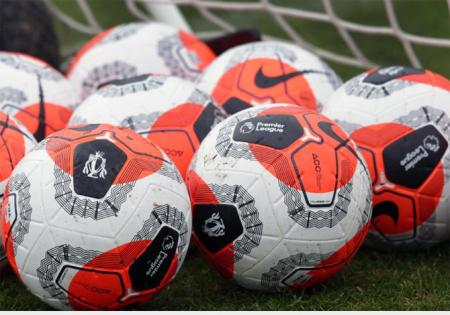

**Everything: counts?**

From the null dataset, we want to zoom into mean goals and mean expected goals per match.

Expected goals is a shooting metric which models the goalscoring probability of each shot a player takes. The difference between the goals and expected goals can show whether teams, on average, were overperforming or underperforming their shooting in matches without fans.

xG is measured for the Home team and xGA is the measurement for the Away team. We will combine the two as we want to look at the average match as a whole.

*count for null attendance* :

In [76]:
# mean goals per game for null attendance
gpg_null = null_df_cm['gf'].mean() + null_df_cm['ga'].mean()
print(gpg_null)

2.6839080459770117


In [77]:
# mean expected goals per game for null attendance
xgpg_null = null_df_cm['xg'].mean() + null_df_cm['xga'].mean()
print(xgpg_null)

2.620977011494253


In [78]:
# gap between mean goals per game and mean expected goals per game for null attendance
xgap_null = gpg_null - xgpg_null
print(xgap_null)

0.06293103448275872


In [79]:
# what is the % difference between mean goals per game and mean expected goals per game for null attendance
percentage_xgap_null = (xgap_null / gpg_null)*100
print(f'{percentage_xgap_null} %')

2.344753747323344 %


This suggests teams were overperforming by 2.345% on their average expected goals per game, when no fans were in attendance.

*count for non_null attendance* :

In [80]:
# mean goals per game for non-null attendance
gpg_non_null = non_null_df_cm['gf'].mean() + non_null_df_cm['ga'].mean()
print(gpg_non_null)

2.7489177489177488


In [81]:
# mean expected goals per game for non-null attendance
xgpg_non_null = non_null_df_cm['xg'].mean() + non_null_df_cm['xga'].mean()
print(xgpg_non_null)

2.6643578643578643


In [82]:
# gap between mean goals per game and mean expected goals per game for non-null attendance
xgap_non_null = gpg_non_null - xgpg_non_null
print(xgap_non_null)

0.0845598845598845


In [83]:
# what is the % difference between mean goals per game and mean expected goals per game for non-null attendance
percentage_xgap_non_null = (xgap_non_null / gpg_non_null)*100
print(f'{percentage_xgap_non_null} %')

3.0761154855643023 %


This suggests teams were overperforming by 3.076% on their average expected goals per game, when fans were in attendance.

**Does: everything count?**

The data are interesting because teams in matches overperform their combined average xG by 0.731% when there are fans in attendance compared to no fans.

Could it be the atmosphere generated by fan attendance that cause this? Allez allez allez.

## Data Visualisation

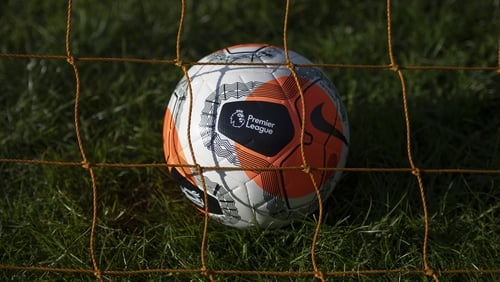

Let's now plot some data for further exploration of null vs non_null attendance to begin our intrigue on whether fans affect player/team/match performance and result.

**Question: to mean or not to mean?**

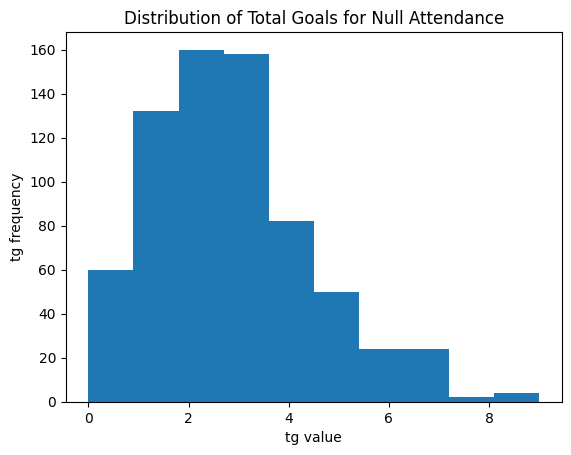

In [85]:
# plot total goals in a game and the frequency it occured for null data.
plt.hist(null_df_cm['tg'])
plt.xlabel('tg value')
plt.ylabel('tg frequency')
plt.title('Distribution of Total Goals for Null Attendance')
plt.show()

This is a positive skew. There were 60 matches with a final scoreline of 0-0.

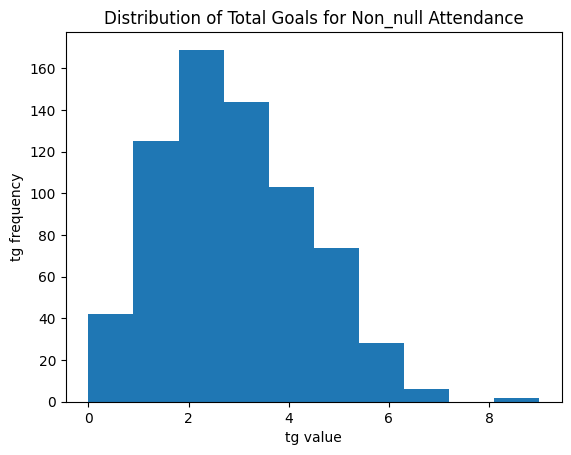

In [87]:
# plot total goals in a game and the frequency it occured for non-null data.
plt.hist(non_null_df_cm['tg'])
plt.xlabel('tg value')
plt.ylabel('tg frequency')
plt.title('Distribution of Total Goals for Non_null Attendance')
plt.show()

This is also a positive skew but slightly more evenly distributed. There were only 40 matches with a final scoreline of 0-0.

With 20 less scoreless games when there are fans in attendance, could this be because the tense atmosphere created by fans in attendance at a stalemate induces a tie more often as teams are scared to lose?

**Advantage: but for who, Chris Kamara?**

Let's now look at the home advantage notion and whether final results were effected by fan attendance in matches.

In [31]:
# home wins, away wins, and draw for null data
home_null_counts = len(null_df_cm[null_df_cm['HAD']=='Home'])
away_null_counts = len(null_df_cm[null_df_cm['HAD']=='Away'])
draw_null_counts = len(null_df_cm[null_df_cm['HAD']=='Draw'])

In [32]:
print(home_null_counts, away_null_counts, draw_null_counts)

269 269 158


With no fans in stadiums, there were 269 wins for the home team, 269 wins for the away team, and 158 draws out of 696 matches. An intriguing balance.

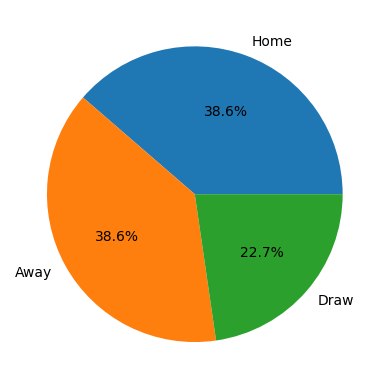

In [86]:
# plot a pie chart which shows the % proportion of each result
y = np.array([home_null_counts, away_null_counts, draw_null_counts])
labels = ['Home', 'Away', 'Draw']
plt.pie(y, labels=labels, autopct='%1.1f%%')
plt.show()

Now to do the same for the non_null data.

In [34]:
# home wins, away wins, and draw for non-null data
home_non_null_counts = len(non_null_df_cm[non_null_df_cm['HAD']=='Home'])
away_non_null_counts = len(non_null_df_cm[non_null_df_cm['HAD']=='Away'])
draw_non_null_counts = len(non_null_df_cm[non_null_df_cm['HAD']=='Draw'])

In [35]:
print(home_non_null_counts, away_non_null_counts, draw_non_null_counts)

257 279 157


There were 257 home wins, 279 away wins, and 157 draws out of 693 matches with fan attendance. A shift on the scales.

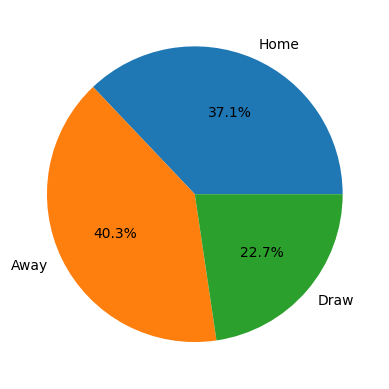

In [36]:
# plot a pie chart which shows the % proportion of each result
y = np.array([home_non_null_counts, away_non_null_counts, draw_non_null_counts])
labels = ['Home', 'Away', 'Draw']
plt.pie(y, labels=labels, autopct='%1.1f%%')
plt.show()

This is very interesting as it shows the home team wins more matches on average when there are no fans in attendance, and the away team wins more matches on average when there are fans in attendance.

Could this be because home fans exert added pressure onto their team which has an adverse of the intended effect? Away advantage.

**Ball: to me, to you?**

Okay, but what about the notion that fans demand their team keeps the ball more at home? Does that show in our covid-19 seasons comparison?

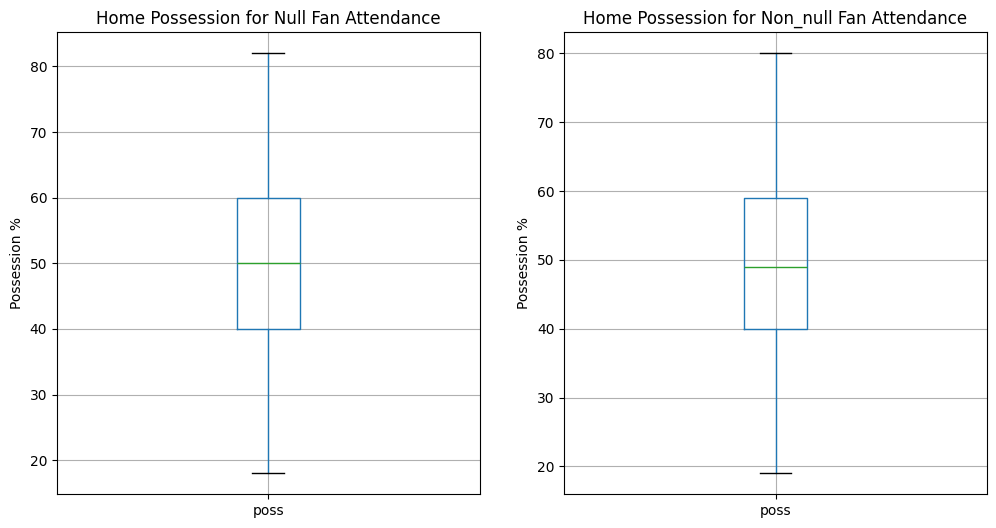

In [91]:
# plot two larger box plots side by side for readability
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# null attendance, measuring possession
null_df_cm.boxplot(column=['poss'], ax=axs[0])
plt.title('Home Possession Without Fans')

# non_null attendance, measuring possession
non_null_df_cm.boxplot(column=['poss'], ax=axs[1])

# labels
plt.title('Home Possession for Non_null Fan Attendance')
plt.ylabel('Possession %')
axs[0].set_title('Home Possession for Null Fan Attendance')
axs[0].set_ylabel('Possession %')
plt.show()

The median home team Possession % is actually slightly lower for non_null than null's 50%, while the IQR is also smaller for non_null.

However both boxplots look almost identical, suggesting home team possession is consistent regardless of fan attendance.

In fact, as the median is around 50% for the home team, and therefore away team too, this may not be that useful an optic. As the dataset includes all 20 teams in the Premier League, we can accept that teams in the bottom half of the table are less likely to keep the ball against teams in the top half. This could be due to ability, form, or playing style, where it is more fashionable for teams to employ possession oriented managers at the higher end of the table. The data here also does not factor in the differing sizes of home grounds across the league, which may impact fan attendance effects.

So perhaps home is more of a feeling than a fact?

**Pressure: what pressure?**

Finally, let's see if penalties awarded for home team per match was affected by attendance or lack thereof during our covid-matches seasons. Were referees more or less generous with or withour fans?

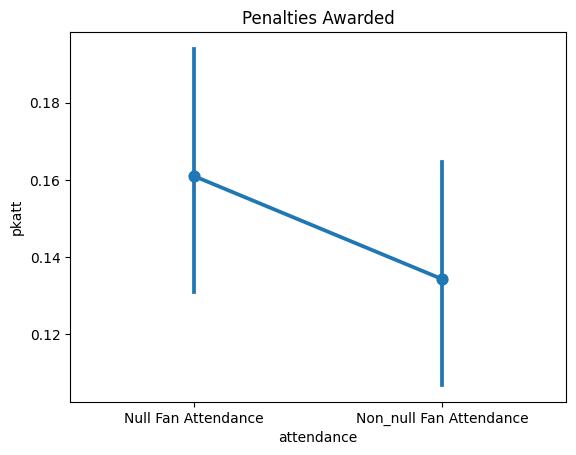

In [93]:
# point plot, vertical coding for readability
plt.figure
sns.pointplot(
    x='attendance',
# pkatt is penalty kicks awarded by referee, not whether it was converted or not by taker
    y='pkatt',
# recombine dataset to plot comparison
    data=pd.concat(
        [null_df_cm.assign(attendance='Null Fan Attendance'),
         non_null_df_cm.assign(attendance='Non_null Fan Attendance')]),
    linestyle=None)

plt.title('Penalties Awarded')
plt.xlabel('attendance')
plt.ylabel('pkatt')
plt.show()


There is a clear decrease in mean penalties awarded for the home side as we move from null fan to non_null fan attendance. Were referees instead more stubborn to give penalties when fan attendance returned?

However, the error bars are fairly wide and overlap which suggests higher variability and more uncertainty in the correlation. So, while the downward slope suggests some correlation between fan attendance and penalties awarded, we need further analysis to check the confidence interval and P-value.


**Shall we: regress or digress?**

Let's show the regression summary for this correlation to determine whether this is statistically significant or not for any hypothesis testing at a later date.

In [94]:
# the method to create a regression summary using smf.ols from statsmodel
def get_regression_summary(x, y, data):
    regression = smf.ols(f'{y} ~ {x}', data=data).fit()
    return regression.summary()

# assign attendance status as numerical values
null_df_cm.loc[:, 'attendance'] = 0
non_null_df_cm.loc[:, 'attendance'] = 1

# create combine dataset for regression
df_cm_rgr = pd.concat([null_df_cm, non_null_df_cm])

# show summary
summary_pkatt = get_regression_summary('attendance', 'pkatt', df_cm_rgr)
print(summary_pkatt)


                            OLS Regression Results                            
Dep. Variable:                  pkatt   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.649
Date:                Thu, 02 Jan 2025   Prob (F-statistic):              0.199
Time:                        21:19:39   Log-Likelihood:                -653.84
No. Observations:                1389   AIC:                             1312.
Df Residuals:                    1387   BIC:                             1322.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1609      0.015     10.950      0.0

The R-squared is 0.001 which means only 0.1% of the variance in penalties awarded were dependant on attendance.

The P-value for attendance is 0.199 so because p > 0.05 it is not statistically significant.

This therefore does not reach the 95% confidence interval threshold, with the current CI at 80.1% reinforcing no significance.

This could be because 1389 observations is not enough. In future we could try adding more variables for better interactions within the model like the name of referee and name or captain for each penalty awarded to see if any correlation occurs there.

Or perhaps it could be more interesting to see the relationship between penalties awarded and penalties scored for null and non_null attendance. Could null attendance affect the general 78% probability for penalty conversion.

But for now there's not much here it seems. Oh well, now we know.

## Final Message

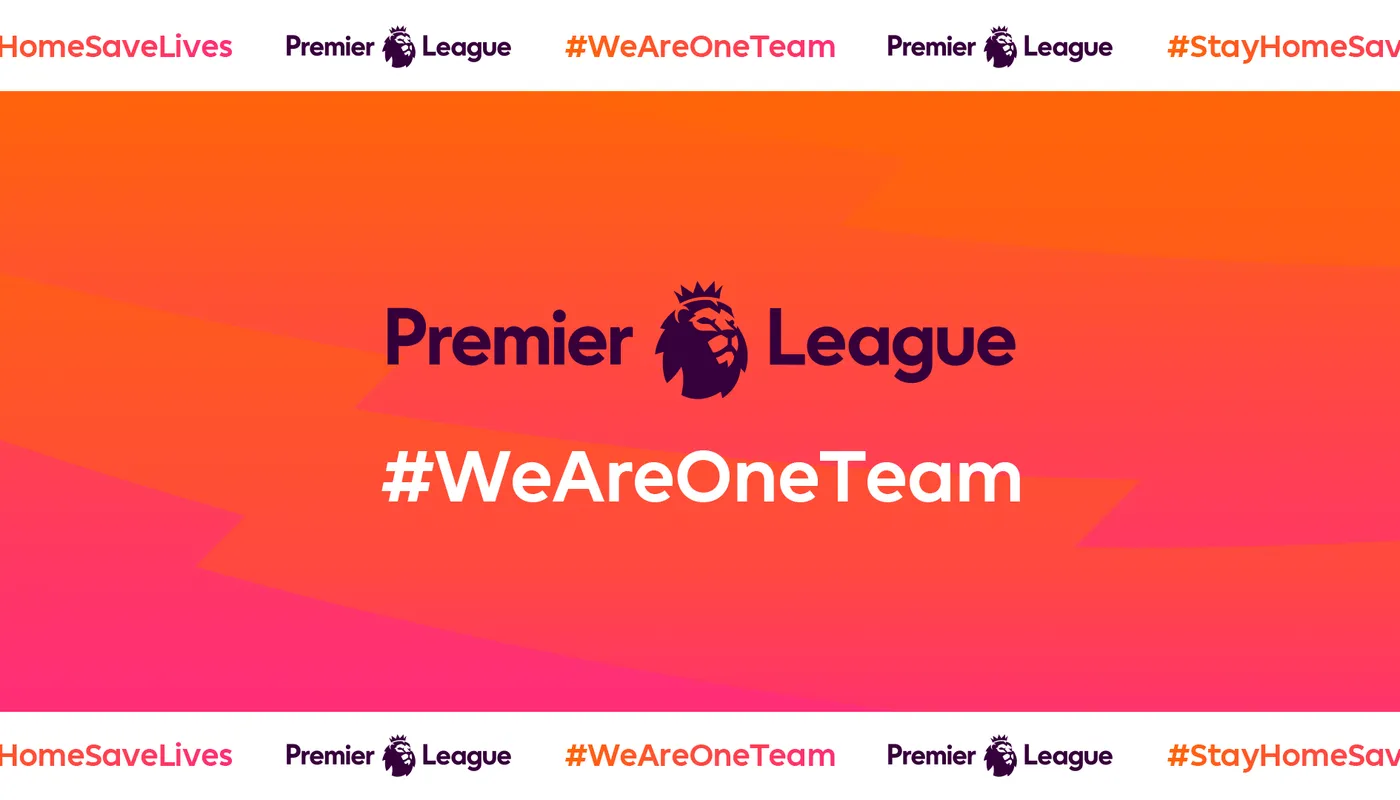

The covid-pandemic threw everything we knew into disarray. But as sport resumed, we questioned the narrative that fans are the most important stakeholder in football as the Premier League claimed. Huge TV deals mean clubs are now financially incentivised to prioritise viewing figures more than fan attendance.

While the 2020/21 season was known for weird and whacky results, as we explored the data around this, we often did not find a major difference between null and non_null attendance results compared to season 2021/22. Or when we did, home teams seemed to gain a slight probablistic advantage without in-person support.

However, the data are not fullproof, missing potentially important predictors as it was not scrapped with my exploration in mind. Our models should also be questioned, noting that fans returned to stadiums in phases so non_null attendance would have included limited capacity allocations. Not to mention the mental and emotional toll covid-19 had, which may have lingered longer than a 1v1 season comparison.

The next steps are to dive deeper and inference test potential hypothesis!